# Start

# Fidelity calculator check

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from lib_SSResult import SSResult## This data we will use
# from lib_SSResult import Histogram

filename2 = '193544_SingleShot.dat'
paramfile2 = '193544_parameters_Fidelity190722_193544.dat'
m2 = SSResult(filename2, paramfile=paramfile2)

data loaded
new center of blobs:  -0.01334753216384485   0.013347532163844846
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
x_g, x_e histograms was made
new center setted: -0.01604240637776815   0.013001808841811005
x_g_pre histogram was made
x_e_pre histogram was made
x_g_sel histogram was made
x_e_sel histogram was made
new center selected setted: -0.016063412396299666   0.012989856509736705
Object is created


0.013001808841811005
0.012989856509736705
regime: raw_data
regime: selected


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/python2.7/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


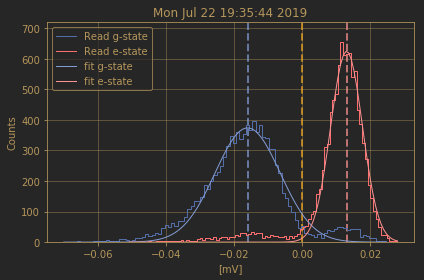

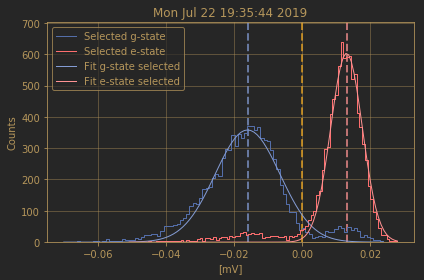

In [4]:
print m2.center_x_e
print m2.center_x_e_select
pic = m2.plot_hists(log=False)
pic2 = m2.plot_hists(log=False,regime='selected')

In [7]:
m2.calculate_fidelity_post()
m2.dict_fidelity

{'Err_e': 0,
 'Err_g': 0,
 'F': 0.923,
 'F_e': 0.9252,
 'F_g': 0.9208,
 'F_gaus': 0,
 'F_gaus_eg': 0,
 'F_gaus_ge': 0,
 'F_post': 0.9232837812674906,
 'F_post_e': 0.9255341215515454,
 'F_post_g': 0.9210334409834358}

# To check, if it is better threshold for postselected data

### new threshold made on selected data

In [13]:
threshold_vec = np.linspace(-0.02, 0.02, 1000)
fid_vec = []
for th in threshold_vec:
    f = m2.get_fro_vs_threshold(m2.x_g_select, m2.x_e_select, th)
    fid_vec.append(f)
fid_max = np.max(fid_vec)
thr_opt = threshold_vec[ np.argmax(fid_vec) ]

print 'fidelity: ', fid_max
print 'threshold: ', thr_opt

print 'before this operation:'
print 'fidelity was: ', m2.dict_fidelity['F_post']
print 'threshold was: ', m2.threshold


fidelity:  0.9236911994242296
threshold:  0.0007594075940759414
before this operation:
fidelity was:  0.923283781267
threshold was:  0


### new threshold on same data. Maybe we just can be more precise?

In [18]:
threshold_vec = np.linspace(-0.02, 0.02, 10000)
fid_vec = []
for th in threshold_vec:
    f = m2.get_fro_vs_threshold(m2.x_g, m2.x_e, th)
    fid_vec.append(f)
fid_max = np.max(fid_vec)
thr_opt = threshold_vec[ np.argmax(fid_vec) ]

print 'fidelity: ', fid_max
print 'threshold: ', thr_opt

print 'before this operation:'
print 'fidelity was: ', m2.dict_fidelity['F_post']
print 'threshold was: ', m2.threshold


fidelity:  0.92315
threshold:  0.0007660766076607664
before this operation:
fidelity was:  0.923283781267
threshold was:  0


0.9236907348283683